<a href="https://colab.research.google.com/github/s20488/COV/blob/main/Anastasiia_Ponkratova_CV_L9_modele_dyfuzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie do modeli dyfuzyjnych i biblioteki diffusers

Instalujemy biblioteki.

In [5]:
%pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow==14.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 37.8 MB/s eta 0:00:00


Pomocnicze funkcje, które przydadzą nam się później.

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image


def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def make_grid(images, size=64):
    """Given a list of PIL images, stack them together into a line for easy viewing"""
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im


# Mac users may need device = 'mps' (untested)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

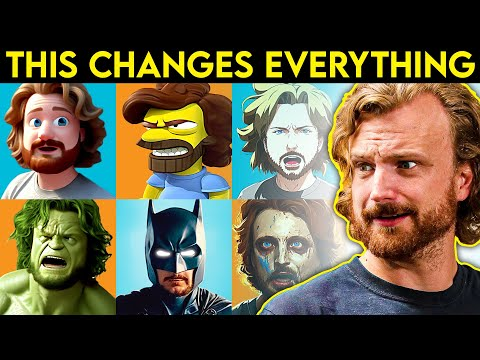

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo("W4Mcuh38wyM")

In [9]:
from diffusers import StableDiffusionPipeline

# Check out https://huggingface.co/sd-dreambooth-library for loads of models from the community
model_id = "sd-dreambooth-library/mr-potato-head"

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    device
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.67k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

In [ ]:
prompt = "an abstract oil painting of sks mr potato head by picasso"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

## Tworzenie pipeline'u dla modelu dyfuzyjnego
API diffusers składa się z 3 kluczowych elementów

1. **Pipelines** - wysokopoziomowe klasy przygotowane do szybkiego generowania przykładów przy pomocy popularnych modeli dyfuzyjnych
2. **Models** - popularne architektury do trenowania modelidyfuzyjnych.
3. **Schedulers** - różne techniki generowania obrazu z szumu w trakcie inferencji oraz dodawania szumu podczas treningu.

Na dzisiejszych laboratoriach storzymy sovue pipeline tworzenia obrazków motyli.

## Zadanie 1: Pobieramy zbiór danych

In [2]:
from datasets import load_dataset
from torchvision import transforms
from torch.utils.data import DataLoader

# 1. Pobierz zbiór danych huggan/smithsonian_butterflies_subset,split=train
dataset = dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train") # TODO
image_size = 32
batch_size = 64 # można zmniejszyc jakby notebook miał problem z pamięcią

# definiujemy augmentacje
# 1 -resize do image_size
# 2 - losowy poziomy obrót
# 3 - konwertujemy na tensor
# 4 - normalizacja do przedziału (-1,1)
preprocess = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
]) # TODO

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}


dataset.set_transform(transform)

# Tworzymy dataloader dla datasetu z określonym batch_sizem
train_dataloader = train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True) # TODO

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Sprawdzamy, czy obrazy wyświetlają się poprawnie.

X shape: torch.Size([8, 3, 32, 32])


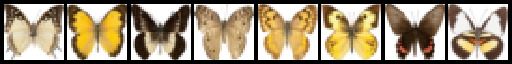

In [3]:
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

## Zadanie 2:Tworzymy scheduler

Chcemy wytrenować model poprzez iteracyjne dodawanie szumu do obrazów, a następnie podawać zaszumione obrazy do modelu.  W trakcie inferencji iteracyjnie usuwamy ten szum. W bibliotece diffusers za ten proces odpowiadają schedulers.

Noise scheduler reguluje ile szumu jest dodawane w trakcie kolejnego kroku.

In [4]:
from diffusers import DDPMScheduler

# TODO: zaimportuj Denoising Diffusion Probabilistic Model Scheduler
noise_scheduler = DDPMScheduler(num_train_timesteps=1000) # stwórz scheduler z liczbą kroków = 1000

Zobaczmy jak będzie się zmieniac ilość dodawanego szumu.

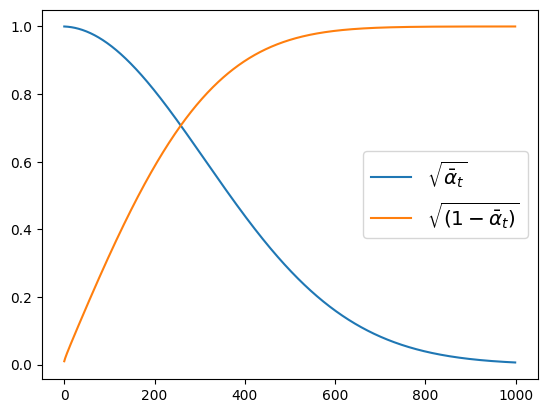

In [5]:
plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large");

Korzystamy z schedulera do dodania szumu w odpowiedniej ilości w zależności od kroku przy pomocy noise_scheduler.add_noise.

Noisy X shape torch.Size([8, 3, 32, 32])


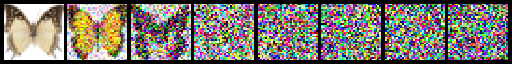

In [6]:
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb.shape)
show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)

## Zadanie 3: definiujemy model
Wykorzystamy architekturę UNet. Kluczową cechą tego modelu jest to, że generuje obrazy w takim samym rozmiarze, co wejście, co jest dla nas przydatne.

Skorzystamy z *UNet2Dmodel* z biblioteki diffusers.

In [7]:
from diffusers import UNet2DModel

# Zaimportuj i stwórz model z zadanymi wartościmi parametrów:
# layers_per_block=2,  # how many ResNet layers to use per UNet block
# block_out_channels=(64, 128, 128, 256),  # More channels -> more parameters
# down_block_types=(
    #     "DownBlock2D",  # a regular ResNet downsampling block
    #     "DownBlock2D",
    #     "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
    #     "AttnDownBlock2D",
    # ),
    # up_block_types=(
    #     "AttnUpBlock2D",
    #     "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
    #     "UpBlock2D",
    #     "UpBlock2D",  # a regular ResNet upsampling block
    # ),
# , samodzielnie określ licznę kanałów na wejściu i wyjściu
model = UNet2DModel(
    in_channels=3,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=(64, 128, 128, 256),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
    sample_size=(image_size, image_size)
).to(device) # TODO

Przy większym rozmiarze obrazów stworzylibyśmy więcej up and down blocks.

Sprawdźmy, czy model wytworzy nam odpowiedni rozmiar obrazy dla losowych danych.

In [13]:
with torch.no_grad():
    model_prediction = model(noisy_xb, timesteps).sample
model_prediction.shape

torch.Size([8, 3, 32, 32])

Trening modelu:

In [14]:
# Training loop
optimizer = torch.optim.AdamW(model.parameters(), lr=4e-4)

losses = []

for epoch in range(30):
    for step, batch in enumerate(train_dataloader):
        clean_images = batch["images"].to(device)
        # Sample noise to add to the images
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]

        # Sample a random timestep for each image
        timesteps = torch.randint(
            0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device
        ).long()

        # Add noise to the clean images according to the noise magnitude at each timestep
        noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

        # Get the model prediction
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # Calculate the loss
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)
        losses.append(loss.item())

        # Update the model parameters with the optimizer
        optimizer.step()
        optimizer.zero_grad()

    if (epoch + 1) % 5 == 0:
        loss_last_epoch = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
        print(f"Epoch:{epoch+1}, loss: {loss_last_epoch}")

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Epoch:5, loss: 0.11574860149994493
Epoch:10, loss: 0.08401046157814562
Epoch:15, loss: 0.06906332424841821
Epoch:20, loss: 0.061762701254338026
Epoch:25, loss: 0.04751908907201141
Epoch:30, loss: 0.048894847044721246


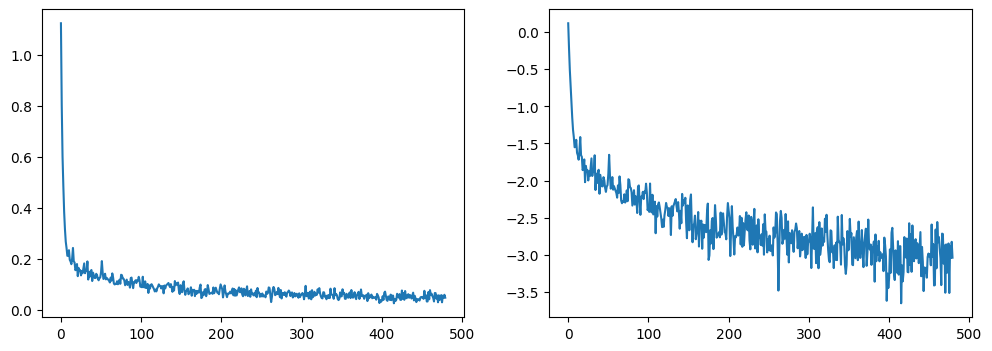

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(losses)
axs[1].plot(np.log(losses))
plt.show()

Generujemy obrazy

In [8]:
from diffusers import DDPMPipeline

# Stwórz pipeline dla modeli dyfuzyjnych z naszym modelem i schedulere
image_pipe = DDPMPipeline(unet=model, scheduler=noise_scheduler) # TODO
pipeline_output = image_pipe(batch_size=1)
generated_image = pipeline_output.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]